# Exploratory Data Analysis (2014 - Present)
In this EDA we'll look at all the data we have from 2014 onwards. This will include:

1. Recruiting class information, including blue-chip ratio
2. Previous success information, including team ELO ratings and number of wins
3. Returning talent metrics from previous season

**Note:** For predicting season in year n, we need the returning players and recruiting info for year n and the season statistics and wins from year n-1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Team Records
- **NOTE:** One goal is to predict wins. This means we need to use one seasons info to predict the NEXT season's wins.
- Data about recruiting, returning talent, and coaches need to be SAME as year of wins
- Data about on-field performance needs to be N-1 year of wins

In [2]:
# Get records for teams
records_df = pd.read_csv('./data/team_records_by_year.csv')

# Get records from 2013 so we can track previous win percentage
records_df = records_df[records_df.year >= 2013].copy()

# Calculate win percentage
records_df['win_pct'] = records_df['wins']/records_df['games_played']


In [3]:
# Calculate previous year win percentage
records_df = records_df.sort_values(by=['team', 'year'])
records_df['prev_win_pct'] = records_df.groupby('team')['win_pct'].shift()

# Now drop the year 2013
records_df = records_df[records_df['year'] > 2013]

records_df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,home_wins,home_losses,away_wins,away_losses,win_pct,prev_win_pct
1657,Air Force,2005,2014,Mountain West,13,9.7,10,3,6,0,3,3,0.769231,0.166667
1784,Air Force,2005,2015,Mountain West,14,8.2,8,6,6,0,2,5,0.571429,0.769231
1911,Air Force,2005,2016,Mountain West,13,9.4,10,3,5,1,4,1,0.769231,0.571429
2038,Air Force,2005,2017,Mountain West,12,4.4,5,7,3,3,2,4,0.416667,0.769231
2167,Air Force,2005,2018,Mountain West,12,6.4,5,7,4,2,1,5,0.416667,0.416667


In [4]:
# Remove some not needed columns
records_2014_df = records_df.drop(columns=['home_wins', 'home_losses', 'away_wins', 'away_losses'], axis=1)
records_2014_df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,win_pct,prev_win_pct
1657,Air Force,2005,2014,Mountain West,13,9.7,10,3,0.769231,0.166667
1784,Air Force,2005,2015,Mountain West,14,8.2,8,6,0.571429,0.769231
1911,Air Force,2005,2016,Mountain West,13,9.4,10,3,0.769231,0.571429
2038,Air Force,2005,2017,Mountain West,12,4.4,5,7,0.416667,0.769231
2167,Air Force,2005,2018,Mountain West,12,6.4,5,7,0.416667,0.416667


In [5]:
records_2014_df[records_2014_df.team == 'South Carolina']

,team,team_id,year,conference,games_played,expected_wins,wins,losses,win_pct,prev_win_pct
1747,South Carolina,2579,2014,SEC,13,5.4,7,6,0.538462,0.846154
1875,South Carolina,2579,2015,SEC,12,3.9,3,9,0.250000,0.538462
2002,South Carolina,2579,2016,SEC,13,6.6,6,7,0.461538,0.250000
2130,South Carolina,2579,2017,SEC,13,7.7,9,4,0.692308,0.461538
2260,South Carolina,2579,2018,SEC,13,5.6,7,6,0.538462,0.692308
2390,South Carolina,2579,2019,SEC,12,4.3,4,8,0.333333,0.538462
2518,South Carolina,2579,2020,SEC,10,2.7,2,8,0.200000,0.333333
2648,South Carolina,2579,2021,SEC,13,6.9,7,6,0.538462,0.200000
2779,South Carolina,2579,2022,SEC,13,6.8,8,5,0.615385,0.538462
2912,South Carolina,2579,2023,SEC,12,5.6,5,7,0.416667,0.615385


#### Recruiting

In [6]:
# Get recruiting info
recruiting_df = pd.read_csv('./data/team_recruiting_w_blue_chip_ratios.csv')

# Filter the years we need
recruiting_2014_df = recruiting_df[recruiting_df.year >= 2014].copy()

# Remove/rename some columns
recruiting_2014_df = recruiting_2014_df.drop(columns=['total', 'blue_sums', 'total_sums'])
recruiting_2014_df = recruiting_2014_df.rename(columns={'rank': 'recruiting_rank', 'points': 'recruiting_rating'})
recruiting_2014_df.head()

,team,year,recruiting_rank,recruiting_rating,talent_level,blue_chip,blue_chip_ratio
510,Alabama,2014,1,319.71,312.7075,20.0,0.755319
511,LSU,2014,2,299.29,276.3850,16.0,0.659341
512,Ohio State,2014,3,296.08,291.0075,16.0,0.673684
513,Florida State,2014,4,286.79,284.1550,15.0,0.586957
514,Texas A&M,2014,5,278.08,246.9850,12.0,0.459770


In [7]:
recruiting_2014_df.year.max()

2024

#### Returning Talent
- Need year n to predict year n
- Note that we don't need the conference here also some of the conferences aren't updated
- ex. Maryland is listed in 2014 as being in ACC, but they moved to the Big Ten for the 2014-2015 season

In [8]:
returning_df = pd.read_csv('data/returning_players_2014.csv')
returning_df = returning_df.drop(columns=['conference']).copy()
returning_df.head()

,year,team,passing_usage,rushing_usage,usages
0,2014,Air Force,0.751,0.652,0.684
1,2014,Akron,1.000,0.989,0.952
2,2014,Alabama,0.078,0.911,0.589
3,2014,Arizona,0.000,0.048,0.142
4,2014,Arizona State,0.990,0.562,0.713


In [9]:
# Check individual team results
returning_df[(returning_df.team == 'South Carolina')]

,year,team,passing_usage,rushing_usage,usages
88,2014,South Carolina,0.249,0.718,0.570
216,2015,South Carolina,0.043,0.444,0.284
345,2016,South Carolina,0.893,0.460,0.564
473,2017,South Carolina,0.490,0.686,0.695
602,2018,South Carolina,0.995,0.975,0.940
732,2019,South Carolina,0.874,0.804,0.772
862,2020,South Carolina,0.930,0.242,0.579
989,2021,South Carolina,0.239,0.749,0.518
1119,2022,South Carolina,0.438,0.497,0.548
1250,2023,South Carolina,0.995,0.365,0.644


#### ELO/FPI Ratings
- Need year n-1 to predict year n
- We will ADD 1 to each year so that each one represents the ELO rating at the START of each year.
- These ratings are at the END of each year. For example, Notre Dame's peaks in 2012 when they went to the national championship game.
- Another example is South Carolina, which peaks at the END of 2013, the last season they were good

In [10]:
ratings_df.year.unique()

NameError: name 'ratings_df' is not defined

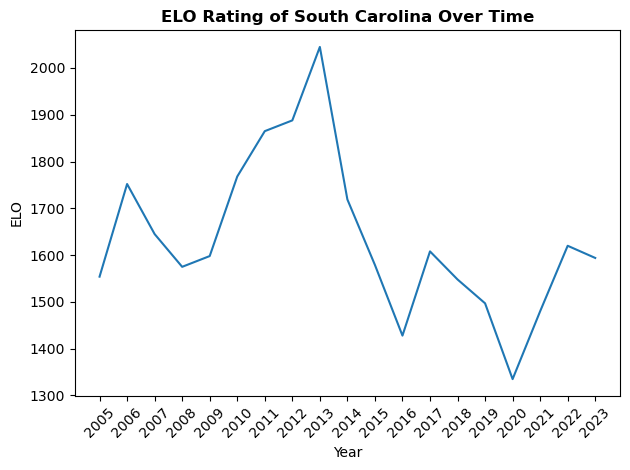

In [13]:
ratings_df = pd.read_csv('data/team_conference_ratings.csv')

team = 'South Carolina'
sns.lineplot(x=ratings_df[ratings_df.team == team].year, 
             y= ratings_df[ratings_df.team == team].elo)
plt.title(f'ELO Rating of {team} Over Time', fontweight='bold')
plt.xlabel('Year')
plt.ylabel("ELO")
plt.xticks(ratings_df.year.unique(), rotation=45)
plt.tight_layout()
plt.savefig('images/elo-usc-overtime.png')
plt.show()

In [14]:
# Grab data going back to 2013, 1 year before starting analysis
ratings_2014_df = ratings_df[ratings_df.year >= 2013].copy()

# Relabel years by +1 so they are rating at start of new season
ratings_2014_df['year'] = ratings_2014_df['year'] + 1

ratings_2014_df.head()

,team,year,conference,elo,fpi,conference_rating
875,Air Force,2014,Mountain West,1071.0,-16.682,-5.908333
876,Akron,2014,Mid-American,1121.0,-12.121,-12.792308
877,Alabama,2014,SEC,2114.0,28.891,15.450000
878,Arizona,2014,Pac-12,1652.0,13.168,14.000000
879,Arizona State,2014,Pac-12,1823.0,21.855,14.000000


#### Last Season Advanced Stats
- Need year n-1 to predict year n
- Perform relabeling here so that advanced stats are from LAST season. Add 1 to each year
- Drop the conference column here as well as there are some years where the conference was not updated after a switch was made

In [15]:
stats_df = pd.read_csv('data/advanced_stats_seasons.csv')

# Switch names of a few categories and drop uneeded columns
stats_df = stats_df.rename(columns={'season': 'year'})
stats_df = stats_df.drop(columns=['offense', 'defense', 'conference'])

# Switch year by 1 so we're getting last seasons stats
stats_df['year'] = stats_df['year'] + 1

# Filter data from 2014 - 2023 (10 years of data)
stats_2014_df = stats_df[stats_df['year'] >= 2014].copy()
stats_2014_df.head()

,year,team,off_drives,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate
12,2014,Air Force,139,137,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913
13,2015,Air Force,165,161,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831
14,2016,Air Force,177,173,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631
15,2017,Air Force,147,148,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048
16,2018,Air Force,138,139,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096


### Strength of Schedule
- Need year n to predict year n for strength of schedule
- Need year n-1 to predict year n for strength of record
- We grab the year, team, sor (Strength of Record), and sos (Strength of Schedule)
- Be careful with strength of record as this may take into account the current season

In [16]:
sos_df = pd.read_csv('data/schedule_strength.csv')
sos_df[sos_df.team == 'South Carolina'].head()

,year,team,sor,sos
31,2005,South Carolina,32,28
151,2006,South Carolina,33,29
279,2007,South Carolina,42,14
394,2008,South Carolina,38,13
510,2009,South Carolina,34,10


In [17]:
# Shift strength of record column to add 1  year so year n-1 predicts year n
sos_df['sor_shifted'] = sos_df.groupby('team')['sor'].shift(1)
sos_df[sos_df.team == 'South Carolina'].head()

,year,team,sor,sos,sor_shifted
31,2005,South Carolina,32,28,NaN
151,2006,South Carolina,33,29,32.0
279,2007,South Carolina,42,14,33.0
394,2008,South Carolina,38,13,42.0
510,2009,South Carolina,34,10,38.0


In [18]:
# Replace the columns
sos_df['sor'] = sos_df['sor_shifted']
sos_df = sos_df.drop(columns={'sor_shifted'})
sos_df[sos_df.team == 'South Carolina'].head()

,year,team,sor,sos
31,2005,South Carolina,NaN,28
151,2006,South Carolina,32.0,29
279,2007,South Carolina,33.0,14
394,2008,South Carolina,42.0,13
510,2009,South Carolina,38.0,10


### Coaching Information
- Need coach in year n but career win percentage from year n-1. Need to shift all win percentages forward by 1

In [82]:
coaches_df = pd.read_csv('data/coach_career_win_pct.csv')
coaches_df = coaches_df.rename(columns={'name': 'coach'})
coaches_df.head()

,coach,team,year,games,wins,losses,cumulative_wins,cumulative_games,career_win_pct
0,Frank Mason,Harvard,1886,14,12,2,12,14,0.857143
1,Walter Camp,Yale,1888,13,13,0,13,13,1.000000
2,Walter Camp,Yale,1889,17,16,1,29,30,0.966667
3,Walter Camp,Yale,1890,14,13,1,42,44,0.954545
4,Alexander Lilley,Ohio State,1890,4,1,3,1,4,0.250000


In [83]:
coaches_df.year.max()

2023

In [84]:
# Shift coaching carrer_win_pct to add 1  year so year n-1 predicts year n
coaches_df['career_win_pct_shifted'] = coaches_df.groupby('coach')['career_win_pct'].shift(1)
coaches_df['career_win_pct_shifted'] = coaches_df['career_win_pct_shifted'].fillna(0)
coaches_df[coaches_df.coach == 'Lane Kiffin']

,coach,team,year,games,wins,losses,cumulative_wins,cumulative_games,career_win_pct,career_win_pct_shifted
10109,Lane Kiffin,Tennessee,2009,13,7,6,7,13,0.538462,0.000000
10338,Lane Kiffin,USC,2010,13,8,5,15,26,0.576923,0.538462
10422,Lane Kiffin,USC,2011,12,10,2,25,38,0.657895,0.576923
10531,Lane Kiffin,USC,2012,13,7,6,32,51,0.627451,0.657895
10630,Lane Kiffin,USC,2013,5,3,2,35,56,0.625000,0.627451
11176,Lane Kiffin,Florida Atlantic,2017,14,11,3,46,70,0.657143,0.625000
11319,Lane Kiffin,Florida Atlantic,2018,12,5,7,51,82,0.621951,0.657143
11469,Lane Kiffin,Florida Atlantic,2019,14,11,3,62,96,0.645833,0.621951
11669,Lane Kiffin,Ole Miss,2020,10,5,5,67,106,0.632075,0.645833
11745,Lane Kiffin,Ole Miss,2021,13,10,3,77,119,0.647059,0.632075


In [85]:
# Replace the columns
coaches_df['career_win_pct'] = coaches_df['career_win_pct_shifted']
coaches_df = coaches_df[['coach', 'team', 'year', 'career_win_pct']].copy()
coaches_df[coaches_df.coach == 'Lane Kiffin']

,coach,team,year,career_win_pct
10109,Lane Kiffin,Tennessee,2009,0.000000
10338,Lane Kiffin,USC,2010,0.538462
10422,Lane Kiffin,USC,2011,0.576923
10531,Lane Kiffin,USC,2012,0.657895
10630,Lane Kiffin,USC,2013,0.627451
11176,Lane Kiffin,Florida Atlantic,2017,0.625000
11319,Lane Kiffin,Florida Atlantic,2018,0.657143
11469,Lane Kiffin,Florida Atlantic,2019,0.621951
11669,Lane Kiffin,Ole Miss,2020,0.645833
11745,Lane Kiffin,Ole Miss,2021,0.632075


### Combine Features
1. records_2014_df
2. recruiting_2014_df
3. returning_df
4. ratings_2014_df

In [86]:
df = records_2014_df.merge(ratings_2014_df, on=['year', 'team', 'conference']) \
                        .merge(recruiting_2014_df, on=['year', 'team']) \
                        .merge(returning_df, on=['year', 'team']) \
                        .merge(stats_2014_df, on=['year', 'team']) \
                        .merge(coaches_df, on=['year', 'team']) \
                        .merge(sos_df, on=['year', 'team'])
df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,win_pct,prev_win_pct,...,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,coach,career_win_pct,sor,sos
0,Air Force,2005,2014,Mountain West,13,9.7,10,3,0.769231,0.166667,...,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913,Troy Calhoun,0.544444,115.0,113
1,Air Force,2005,2015,Mountain West,14,8.2,8,6,0.571429,0.769231,...,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831,Troy Calhoun,0.572816,48.0,86
2,Air Force,2005,2016,Mountain West,13,9.4,10,3,0.769231,0.571429,...,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631,Troy Calhoun,0.572650,71.0,113
3,Air Force,2005,2017,Mountain West,12,4.4,5,7,0.416667,0.769231,...,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048,Troy Calhoun,0.592308,49.0,82
4,Air Force,2005,2018,Mountain West,12,6.4,5,7,0.416667,0.416667,...,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096,Troy Calhoun,0.577465,94.0,86


In [29]:
df.columns

Index(['team', 'team_id', 'year', 'conference', 'games_played',
       'expected_wins', 'wins', 'losses', 'win_pct', 'prev_win_pct', 'elo',
       'fpi', 'conference_rating', 'recruiting_rank', 'recruiting_rating',
       'talent_level', 'blue_chip', 'blue_chip_ratio', 'passing_usage',
       'rushing_usage', 'usages', 'off_drives', 'def_drives', 'off_explode',
       'def_explode', 'off_ppa', 'def_ppa', 'off_success_rate',
       'def_success_rate', 'coach', 'sor', 'sos'],
      dtype='object')

In [87]:
# Save this dataframe as the "working dataframe" for later use
df.to_csv('data/working_df.csv', index=False)

#### Distributions of Features

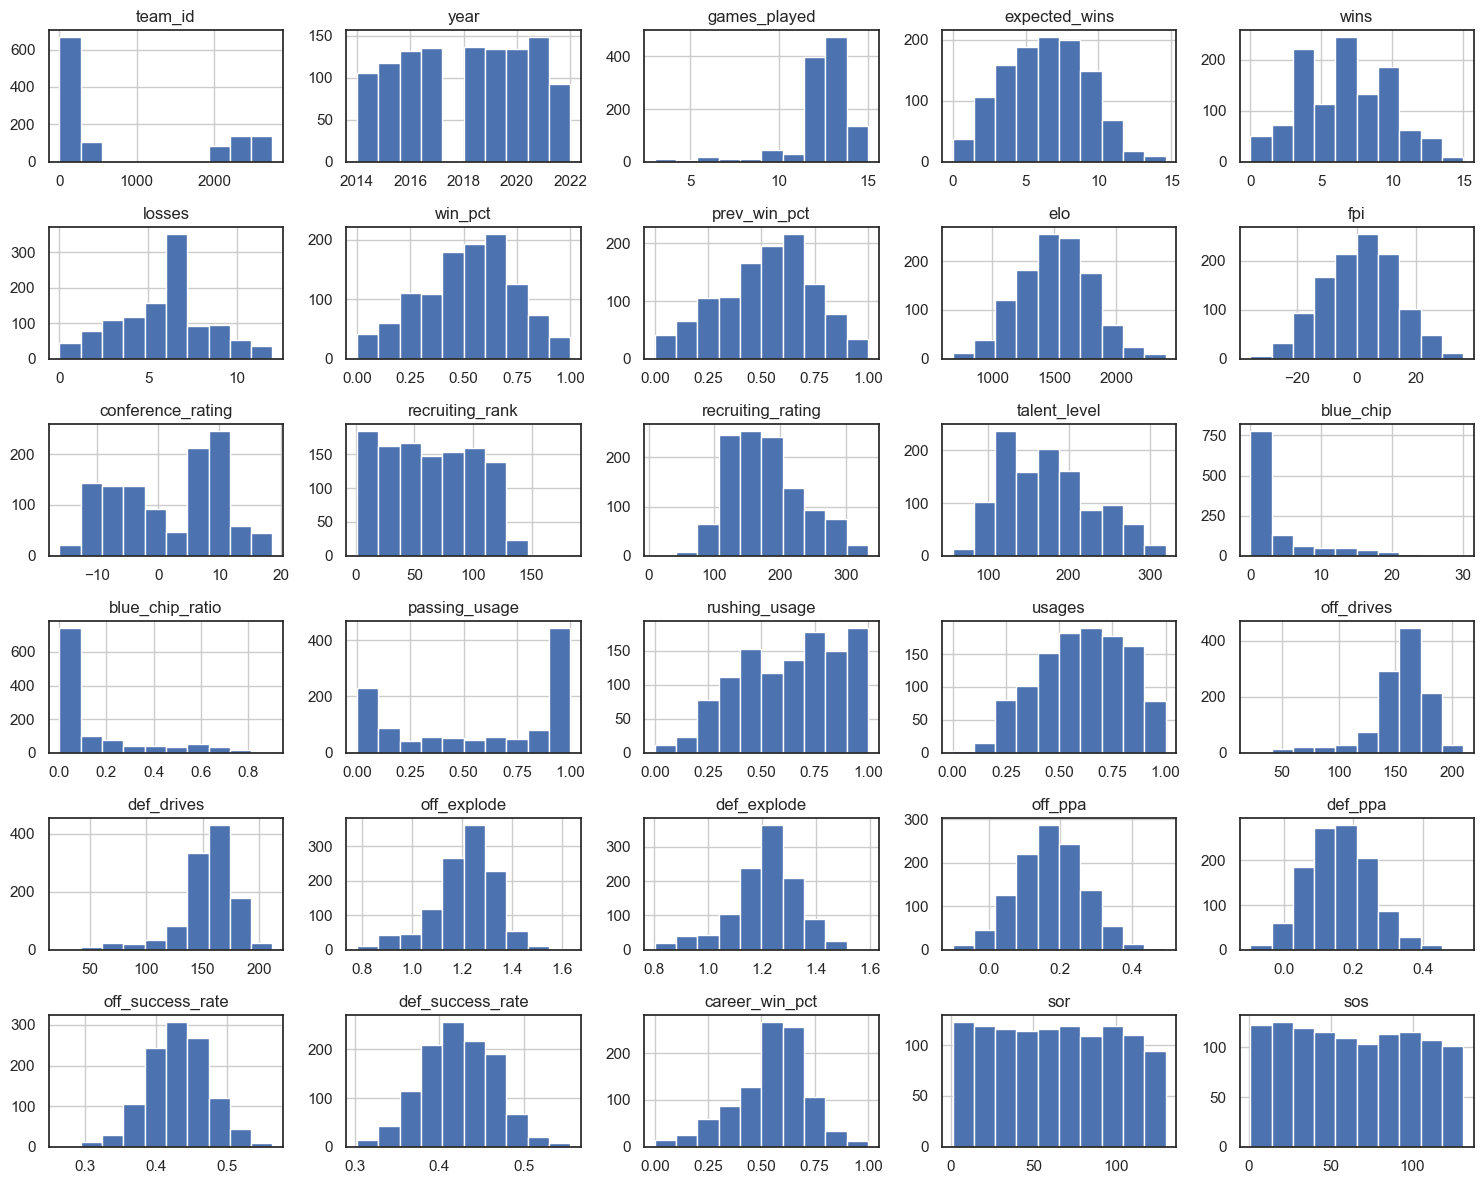

In [41]:
sns.set_theme(style='white')
df.hist(figsize=(15,12))
plt.tight_layout()
plt.savefig('images/numeric_features_histograms.png')
plt.show()

#### Correlations between Numeric Features

In [53]:
# Get numeric features
numeric = df.drop(columns={'team','team_id', 'year','conference', 'coach'})

# Remove obviously dependent features
numeric = numeric.drop(columns={'wins', 'losses', 'blue_chip',
                                'passing_usage', 'rushing_usage'})

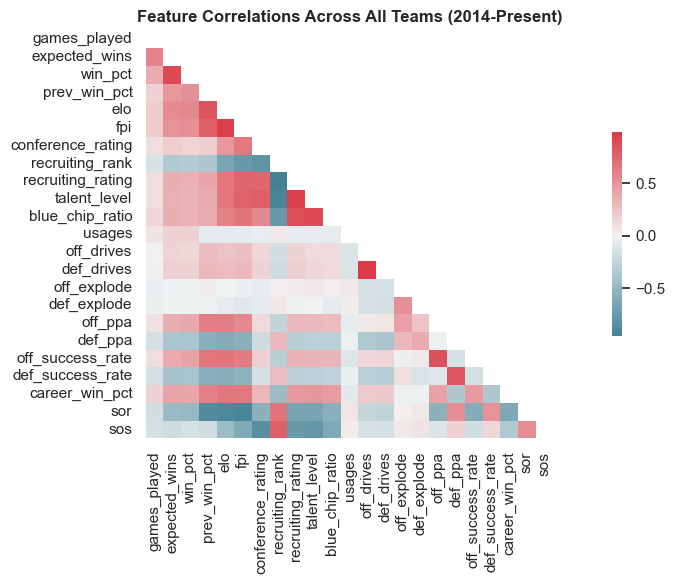

In [54]:
from seaborn import set_style
sns.set_theme(style='white')
# Calculate the correlations amongst features 
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

# Create nicer lower triangular seaborn correlation heatmap. Use diverging color palette to get -1,0,1
fig, ax = plt.subplots(figsize=(12,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, # Data
            mask=mask, # Mask certain cells
            cmap=cmap, # Colormap
            square=True, # Make squares
            #grid = False,
            #annot=True, # Show values
            #annot_kws={'size':6},
            #vmax=0.5, # Set scale for colors (all above will have same)
            #vmin=-0.5, # Min scale
            center=0, # Force center which is white for diverging palette
            #linewidths=0, # Width of line between squares
            cbar_kws={'shrink':0.5}) # Size of legend
plt.title('Feature Correlations Across All Teams (2014-Present)', fontweight='bold')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', bbox_inches='tight')
plt.show()


In [55]:
# Save heatmap and table of values
corr.to_csv('out/correlation_table.csv')

big_win_corr = corr['win_pct'].sort_values(ascending=False)
biggest_corr_list = list(big_win_corr)
big_win_corr

win_pct              1.000000
expected_wins        0.890919
elo                  0.562996
fpi                  0.519633
prev_win_pct         0.516279
off_success_rate     0.427274
career_win_pct       0.406526
off_ppa              0.397858
games_played         0.377360
recruiting_rating    0.352579
talent_level         0.340630
blue_chip_ratio      0.340492
usages               0.178420
def_drives           0.169005
conference_rating    0.155510
off_drives           0.147813
def_explode         -0.009979
off_explode         -0.012921
sos                 -0.144516
recruiting_rank     -0.329202
def_ppa             -0.375305
def_success_rate    -0.395584
sor                 -0.491960
Name: win_pct, dtype: float64

#### Investigating Correlated Variables with Win Percentage
- Positive: elo, fpi, points, blue_chip_ratio, off_success_rate, off_ppa
- Negative: recruiting_rank, def_success_rate, def_ppa

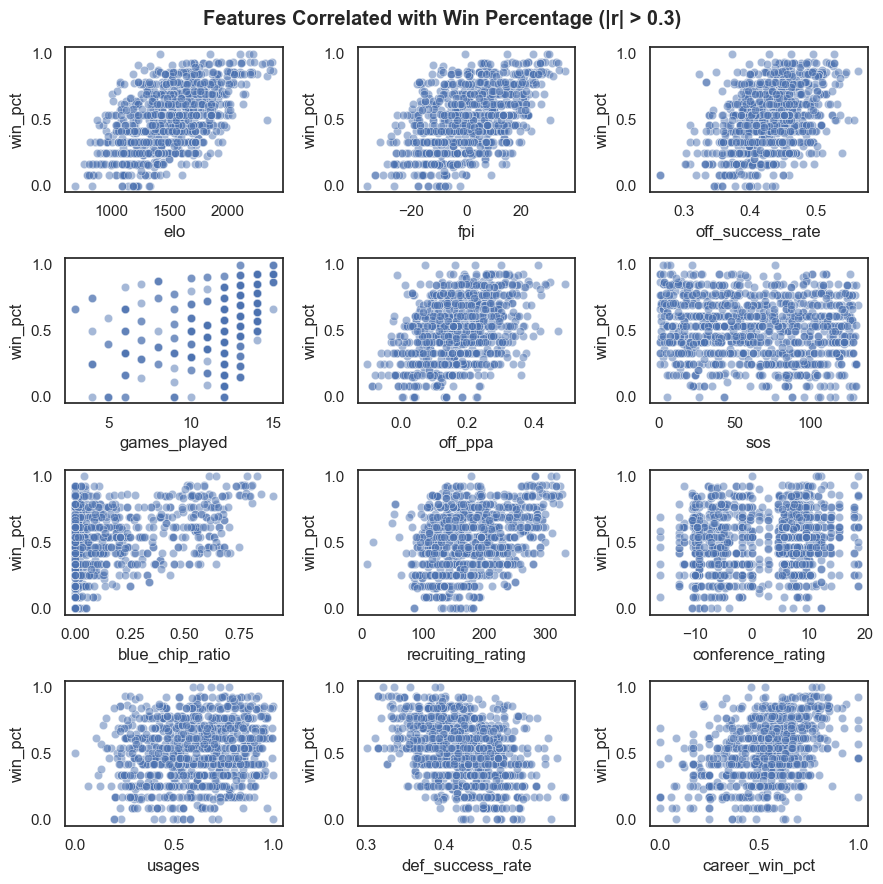

In [56]:
features = ['elo', 'fpi', 'off_success_rate', 'games_played', 'off_ppa', 'sos',
            'blue_chip_ratio', 'recruiting_rating', 'conference_rating', 'usages',
            'def_success_rate', 'career_win_pct']
fig, axes = plt.subplots(len(features)//3,3, figsize=(9,9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.scatterplot(data=numeric, x=features[i], y='win_pct', ax=ax, alpha=0.5)

plt.suptitle('Features Correlated with Win Percentage (|r| > 0.3)', fontweight='bold')
plt.tight_layout()
plt.savefig('images/high-correlated-with-win-pct.png')
plt.show()

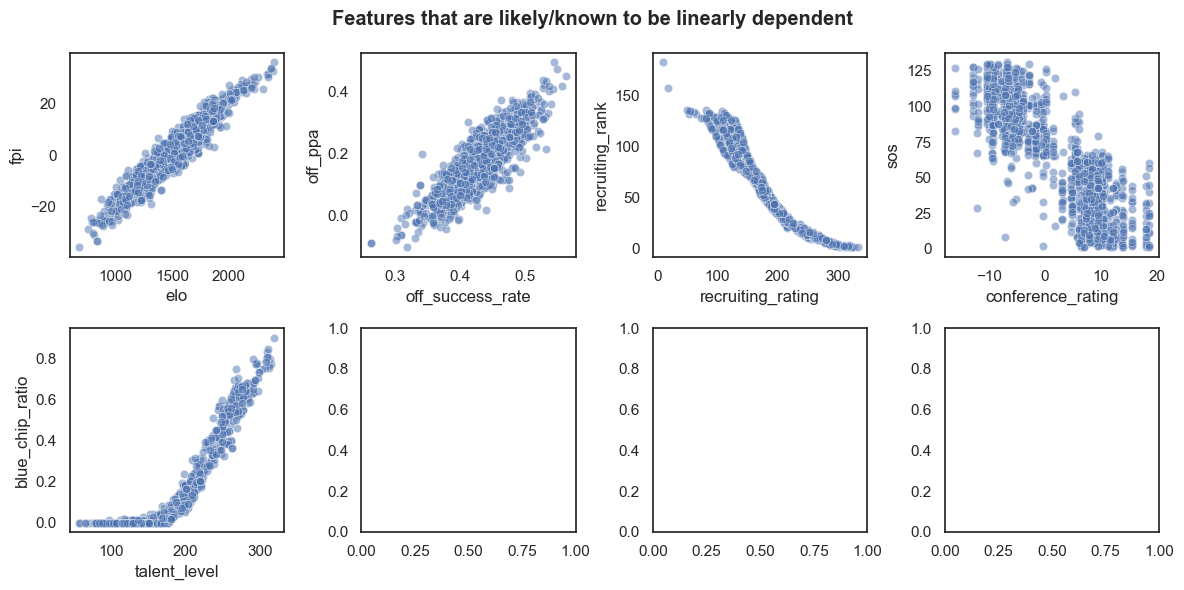

In [59]:
# Plot some features against each other that look highly correlated
#features = ['elo', 'fpi', 'off_success_rate', 'off_ppa']
fig, axes = plt.subplots(2,4, figsize=(12,6))
sns.scatterplot(data=numeric, x='elo', y='fpi', ax=axes[0][0], alpha=0.5)
sns.scatterplot(data=numeric, x='off_success_rate', y='off_ppa', ax=axes[0][1], alpha=0.5)
#sns.scatterplot(data=numeric, x='def_success_rate', y='def_ppa', ax=axes[2], alpha=0.5)
sns.scatterplot(data=numeric, x='recruiting_rating', y='recruiting_rank', ax=axes[0][2], alpha=0.5)
sns.scatterplot(data=numeric, x='conference_rating', y='sos', ax=axes[0][3], alpha=0.5)
sns.scatterplot(data=numeric, x='talent_level', y='blue_chip_ratio', ax=axes[1][0], alpha=0.5)
plt.suptitle('Features that are likely/known to be linearly dependent', fontweight='bold')
plt.tight_layout()
plt.savefig('images/possibly-dependent-features.png')
plt.show()

ELO and FPI as well as Offensive success rate and offensive predicted points added, are clearly in someway linearly dependent or similiarly calculated. Off_ppa and success rate makes sense. FPI is proprietary.

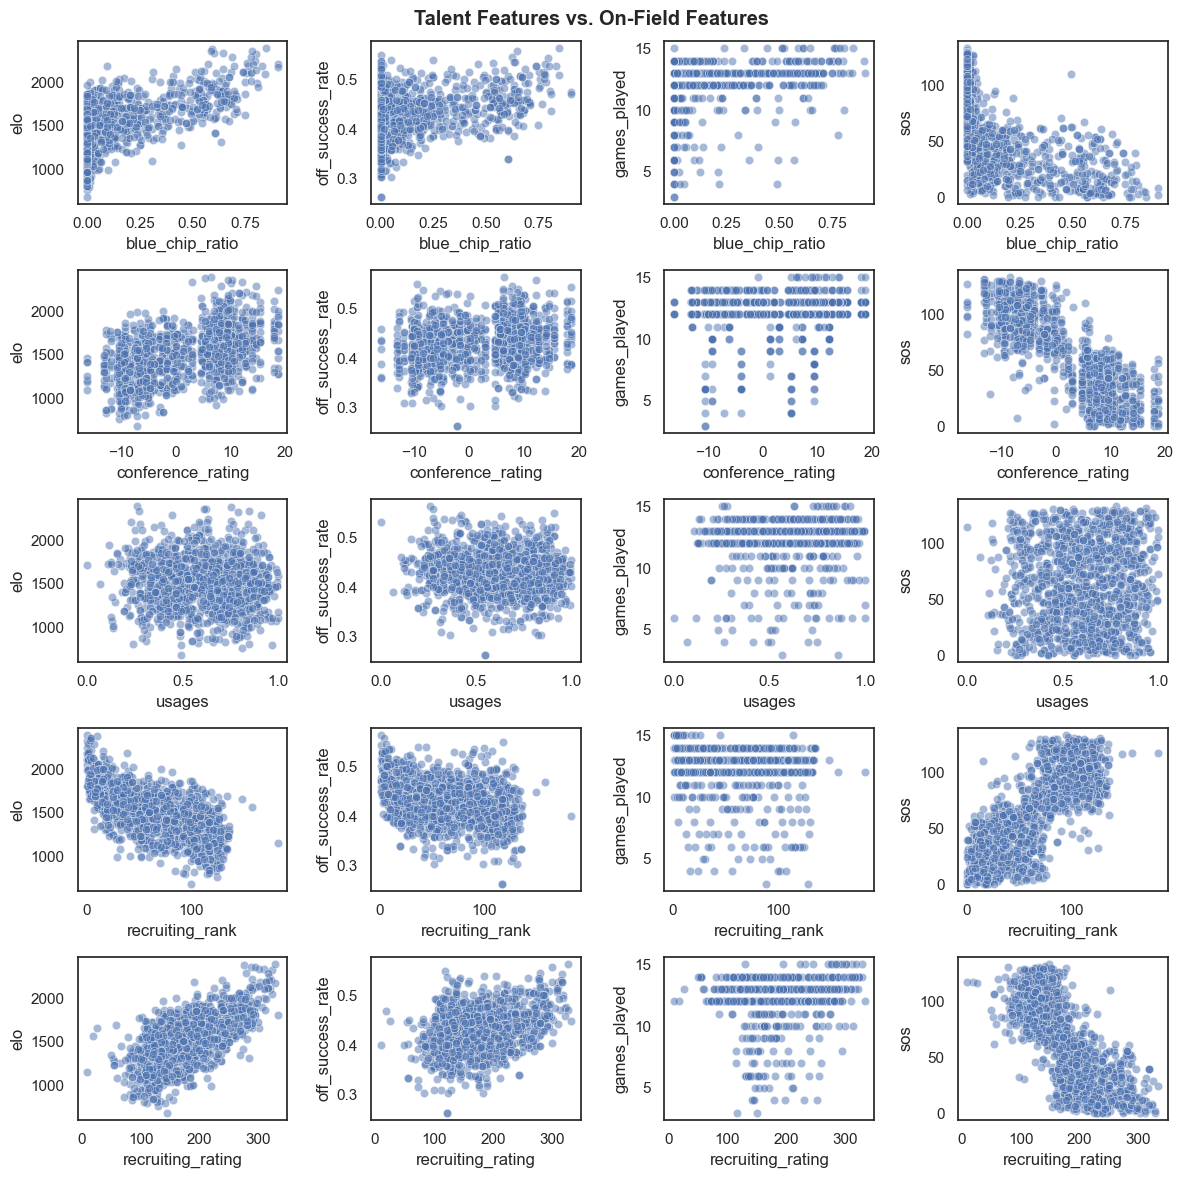

In [30]:
# Plot talent features against on field features
talent_features = ['blue_chip_ratio', 'conference_rating', 'usages', 'recruiting_rank', 'recruiting_rating']
on_field_features = ['elo', 'off_success_rate', 'games_played', 'sos']
fig, axes = plt.subplots(len(talent_features),len(on_field_features), figsize=(12,12))

for i, talent_feature in enumerate(talent_features):
    for j, on_field_feature in enumerate(on_field_features):
        ax = axes[i,j]
        sns.scatterplot(data=numeric, x=talent_feature, y=on_field_feature, ax=ax, alpha=0.5)

plt.suptitle('Talent Features vs. On-Field Features', fontweight='bold')
plt.tight_layout()
plt.savefig('images/talent-vs-onfield-features.png')
plt.show()

### Categorical Features

In [88]:
categorical = ['team', 'conference', 'coach']
numerical = ['elo', 'win_pct', 'points', 'blue_chip_ratio']

#### Old: Cleaning Conference Data

Differences in conferences are appearing when teams switched conferences in a given year:
1. Louisville: American Athletic -> ACC in 2014
2. Maryland: ACC -> Maryland in 2014
3. New Mexico State  -> Independent in 2013, Sun Belt 2014-2017, Independent 2018-2022, Conference USA 2023 - Present
4. Rutgers -> Big East 1991-2012, AAC in 2013, Big Tem 2014-Present
5. Western Kentucky -> 99-2000 (Ohio Valley), 2001-2006 (Gateway Football Conference), 2007 (FCS Ind), 2008 (FBS Independent), 2009-2014 (Sun Belt), 2014-Present Conference USA
6. Navy 

In [89]:
# Note above that we didn't merge on conference, because some teams chan
#(df.conference_x == df.conference_y).value_counts()

In [90]:
#df[df.conference_x != df.conference_y][['team', 'year', 'conference_x', 'conference_y']]